## Mini Project 2

## Lecture Transcript Word Frequency Analysis

## 100 Points.

```mermaid
graph TB
    
EPT["1.1<br>extract_pdf_text"]
RH["1.2<br>remove_headers"]
RP["1.3<br>remove_parentheses"]
RS["1.4<br>remove_speakers"]

SIS["2.1<br>split_into_sentences"]
TS["2.2<br>tokenize_sentence"]
RSW["2.3<br>remove_stopwords"]

SAC["3.1<br>save_as_csv"]

CWF["4.1<br>update_word_frequency"]
PWFD["4.2<br>plot_word_frequency_dist"]
SWBF["4.3<br>sort_words_by_frequency"]
FBIOW["4.4<br>find_bucket_index_of_words"]
SAJ["4.5<br>save_as_json"]
PSWF["4.6<br>plot_stacked_word_frequency"]

EPT --> RH
RH --> RP
RP --> RS

RS --> SIS
SIS --> TS
TS --> RSW

RSW --> SAC

RSW --> CWF
CWF --> PWFD
CWF --> SWBF
SWBF --> FBIOW

FBIOW --> SAJ

FBIOW --> PSWF
CWF --> PSWF

subgraph "Extract Text Contents"
    EPT
    RH
    RP
    RS
end

subgraph "Natural Language Preprocessing"
    SIS
    TS
    RSW
end

subgraph "Save the Cleaned Text"
    SAC
end

subgraph "Word Frequency Analysis"
    CWF
    PWFD
    SWBF
    FBIOW
    SAJ
    PSWF
end
```

### Task 1 (30 pts): Extract text contents

#### 1.1 (5 pts): Extract the text from a PDF file.

Write a function `extract_pdf_text(file_path)` that:

- **Input:** A string `file_path` specifying the path to a PDF file.
- **Output:** A string containing all the text extracted from the PDF file.

**Note:**
- For this task, you may use the [`pypdf` module](https://github.com/py-pdf/pypdf) to extract text from the PDF file.
  - To install the module, open a terminal and run 
  ```bash
  pip install pypdf
  ```
  If you are using Linux or MacOS, you may need to run `pip3` instead of `pip`.
- Join the text from different pages with a space.

In [1]:
from pypdf import PdfReader

def extract_pdf_text(file_path):
    """
    Extracts text from a PDF file as a string
    IN: file_path, str, path to the PDF file
    OUT: text, str, extracted text from all pages joined together with whitespaces
    """
    if not isinstance(file_path, str):
        print("Please enter a valid file_path")
        return
    # create a reader to read the PDF file
    reader = PdfReader(file_path)

    text_list = [] # list to collect text from each page
    for page in reader.pages:
        # extract text from the page
        page_text = page.extract_text() 
        # append the text to the list
        if page_text:
            text_list.append(page_text)

    # join the text from all pages with whitespaces
    text = "".join(text_list)
    print(text)
    return text

#text1 = extract_pdf_text("data/transcript 1.pdf")
text4 = extract_pdf_text("data/transcript 4.pdf")

StreamBox 
**********DISCLAIMER**********  
THE FOLLOWING IS AN UNEDITED DRAFT TRANSLATION. THIS TRANSCRIPT MAY NOT BE 
VERBATIM, HAS NOT BEEN PROOFREAD AND MAY CONTAIN ERRORS. THESE CHECK WITH 
THE SPEAKERS FOR ANY CLARIFICATION.  
THIS TRANSCRIPT MAY NOT BE COPIED OR DISSEMINATED UNLESS YOU OBTAIN WRITTEN 
PERMISSION FROM THE OFFICE OR SERVICE DEPARTMENT THAT IS PROVIDING CART 
CAPTIONING TO YOU.  
THIS TRANSCRIPT MAY NOT USED IN A COURT OF LAW. -FT  
**********DISCLAIMER**********  
RNB ZR CS 198 8:30-9:50 a.m. ET  
September 19, 2024  
>> INSTRUCTOR: For sets, we also use parentheses. And there's an important distinction 
between these three types of data subsets and this one . Very important distinction. The 
dictionaries are (Indiscernible) it's quite different to this. We call them characteristic . This 
two. There are sequences. These two. Sets -- let me do here -- sets are different from these 
two in that sense. Sets have no sequences . When we say that something is a sequenc

#### 1.2 (7 pts): Remove headers.

Write a function `remove_headers(text)` that:

- **Input:** A string `text` extracted from the PDF file.
- **Output:** A string that does not contain the header texts.

**Note:**
- Some lecture transcripts may contain a header with the service name "StreamBox" on the first page. Remove it if it is present. See `transcript 1.pdf` for an example.
- Some lecture transcripts may start with a Disclaimer. Remove all the text enclosed by `**********DISCLAIMER**********` (included). See `transcript 4.pdf` for an example.


In [2]:
def remove_headers(text):
    """
    Removes headers from the text
    IN: text, str, text to remove headers from
    OUT: text, str, text with headers removed
    """

    if not isinstance(text, str):
        return
    
    # if there is any leading "StreamBox", remove it
    header = "StreamBox"
    if text.startswith(header):
        text = text[len(header):].strip()

    # if there is any **********DISCLAIMER**********, find the matched end, and remove it
        disclaimer = "**********DISCLAIMER**********"
        first_index = text.find(disclaimer)
        if first_index != -1:
            text = text[len(disclaimer):].strip()
            second_index = text.find(disclaimer)
            if(second_index) != -1:
                text = text[second_index + len(disclaimer):].strip()
                
    return text

print(remove_headers(text4))

RNB ZR CS 198 8:30-9:50 a.m. ET  
September 19, 2024  
>> INSTRUCTOR: For sets, we also use parentheses. And there's an important distinction 
between these three types of data subsets and this one . Very important distinction. The 
dictionaries are (Indiscernible) it's quite different to this. We call them characteristic . This 
two. There are sequences. These two. Sets -- let me do here -- sets are different from these 
two in that sense. Sets have no sequences . When we say that something is a sequence, it's 
because it exists in order, and sets do not have order. [word?] Analysis totally different to 
this, totally different to this, totally different to this. It's mapping. When you have key 
coccode -- codon and.[word?]. Collections of these things. Call Peter column A. John column 
B. I cannot associate grades with names as an example. This language, Python, is very 
syntactic.  
What that means is unfortunately, this is my personal opinion, you have to watch out 
where do you pu

#### 1.3 (10 pts): Remove transcription system notes enclosed by parentheses.

Write a function `remove_parentheses(text)` that:

- **Input:** A string `text` that has been processed by the previous functions.
- **Output:** A string that does not contain the transcription system notes enclosed by parentheses.

**Note:**
- Some lecture transcripts use parentheses to provide additional information about the transcription system. Remove all the text enclosed by parentheses. For example, `[Captioner standing by]` in `transcript 1.pdf`.
- There are NO nested parentheses in the lecture transcripts.
- The parentheses may either be round parentheses `()` or square parentheses `[]`.
- Some parentheses may be followed immediately by a period. For example, `(Away From Mic).` in `transcript 4.pdf`. In this case, you should remove the period as well.
- You are welcome to use regular expressions to solve this task, but it is not required. You can use Python built-in string methods to achieve the same result.


In [3]:
import re # if you don't know regular expressions, ignore this import, and use Python plain vanilla string methods

def remove_parentheses(text):
    """
    Removes text within parentheses
    IN: text, str, text to remove notes enclosed in parentheses
    OUT: text, str, text without parentheses notes
    """

    if not isinstance(text, str):
        return
    
    # remove round parentheses () and the text within them. If there is a trailing period, remove it as well
    while '(' in text and ')' in text:
        starting_parentheses = text.find('(')
        end_parentheses = text.find(')', starting_parentheses)
        if end_parentheses != -1:
            # Remove the text including the parentheses and any trailing period
            text = text[:starting_parentheses] + text[end_parentheses + 1:].lstrip('. ')
        else:
            break

    # remove square parentheses [] and the text within them. If there is a trailing period, remove it as well
    while '[' in text and ']' in text:
        starting_parentheses = text.find('[')
        end_parentheses = text.find(']', starting_parentheses)
        if end_parentheses != -1:
            # Remove the text including the parentheses and any trailing period
            text = text[:starting_parentheses] + text[end_parentheses + 1:].lstrip('. ')
        else:
            break

    return text

print(remove_parentheses(text4))

StreamBox 
**********DISCLAIMER**********  
THE FOLLOWING IS AN UNEDITED DRAFT TRANSLATION. THIS TRANSCRIPT MAY NOT BE 
VERBATIM, HAS NOT BEEN PROOFREAD AND MAY CONTAIN ERRORS. THESE CHECK WITH 
THE SPEAKERS FOR ANY CLARIFICATION.  
THIS TRANSCRIPT MAY NOT BE COPIED OR DISSEMINATED UNLESS YOU OBTAIN WRITTEN 
PERMISSION FROM THE OFFICE OR SERVICE DEPARTMENT THAT IS PROVIDING CART 
CAPTIONING TO YOU.  
THIS TRANSCRIPT MAY NOT USED IN A COURT OF LAW. -FT  
**********DISCLAIMER**********  
RNB ZR CS 198 8:30-9:50 a.m. ET  
September 19, 2024  
>> INSTRUCTOR: For sets, we also use parentheses. And there's an important distinction 
between these three types of data subsets and this one . Very important distinction. The 
dictionaries are it's quite different to this. We call them characteristic . This 
two. There are sequences. These two. Sets -- let me do here -- sets are different from these 
two in that sense. Sets have no sequences . When we say that something is a sequence, it's 
because

#### 1.4 (8 pts): Remove speaker notations.

Write a function `remove_speakers(text)` that:

- **Input:** A string `text` that has been processed by the previous functions.
- **Output:** A string that does not contain the speaker notations.

**Note:**
- Speaker notations start with two greater-than symbols `>>`, followed by the speaker's name in uppercase letters, and end with a colon `:`. For example, `>> INSTRUCTOR:`.
- `>>` symbols are used only for speaker notations and NOT for any other purposes.
- You are welcome to use regular expressions to solve this task, but it is not required. You can use Python built-in string methods to achieve the same result.

In [4]:
import re # if you don't know regular expressions, ignore this import, and use Python plain vanilla string methods

def remove_speakers(text):
    """
    Removes speaker names from the text
    IN: text, str, text to remove speaker notations from
    OUT: text, str, text without speaker notations
    """
    if not isinstance(text, str):
        print("Please enter a valid text string")
        return
    
    while '>>' in text:
            start = text.find('>>')
            end = text.find(':', start)
            if end != -1:
                # Remove the text including the parentheses and any trailing period
                text = text[:start] + text[end + 1:].lstrip('. ')
            else:
                break

    return text
#print(remove_speakers(text4))

### Task 2 (20 pts): Natural Language Preprocessing

In this task, you may use a Natural Language Processing module [`spaCy`](https://spacy.io/) to preprocess the text data.

**Installation Instructions:**
1. To install the spaCy module, open a terminal and run:
   ```bash
   pip install spacy
   python -m spacy download en_core_web_sm
    ```
    If you are using Linux or MacOS, you may need to run `pip3` instead of `pip`, and `python3` instead of `python`.

#### 2.1 (6 pts): Split text into sentences.

Write a function `split_into_sentences(text)` that

- **Input:** A string `text` that has been processed by the previous functions.
- **Output:** A list of strings, where each string is a sentence.

**Note:**

- `spaCy` provides a sentence segmentation method that can be used to split the text into sentences. Below is an example of how to implement this functionality:

  ```python
  import spacy

  nlp = spacy.load("en_core_web_sm") # Load the English language model

  text = "This is a sentence. This is another sentence."
  doc = nlp(text) # Process the input text

  # Extract sentences from the processed document
  sentences = [sent.text for sent in doc.sents]
  print(sentences)
  ```
  The printed output will be 
  ```python
  ['This is a sentence.', 'This is another sentence.']
  ```

In [5]:
import spacy

nlp = spacy.load("en_core_web_sm")

def split_into_sentences(text):
    """
    Splits text into sentences
    IN: text, str, text to split into sentences
    OUT: sentences, list[str], sentences in the text
    """
    if not isinstance(text, str):
        return []
    
    # join lines into a single paragraph
    text = text.replace("\n", " ")

    # remove leading and trailing whitespaces in the text
    text = text.strip()

    # use spaCy to split the text into sentences
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]

    return sentences



#### 2.2 (8 pts): Tokenize sentences and remove punctuations and spaces.

Write a function `tokenize_sentence(sentence)` that

- **Input:** A string `sentence` that has been processed by the previous functions.
- **Output:** A list of strings, where each string is a lemmatized token in the sentence.

**Note:**

- You can use the `spaCy` module to tokenize the sentence and remove punctuation and spaces. Below is an example demonstrating how to implement this functionality:

  ```python
  import spacy

  nlp = spacy.load("en_core_web_sm") # Load the English language model
  
  sentence = "This is a sentence."
  doc = nlp(sentence) # Process the input sentence

  # Extract lemmatized tokens, excluding punctuation and spaces
  tokens = [
    token.lemma_ 
    for token in doc 
    if not token.is_punct and not token.is_space
  ]
  print(tokens)
  ```
  The printed output will be 
  ```python
  ['this', 'be', 'a', 'sentence']
  ```


In [6]:
import spacy

nlp = spacy.load("en_core_web_sm")

def tokenize_sentence(sentence):
    """
    Tokenizes sentence into lemmatized words
    IN: sentence, str, sentence to tokenize
    OUT: tokenized_sentence, list[str], tokenized sentences
    """
    if not isinstance(sentence, str):
        return []
    
    # use spaCy to tokenize the sentence into lemmatized words
    doc = nlp(sentence)
    tokenized_sentence = [ token.lemma_  for token in doc if not token.is_punct and not token.is_space]
    return tokenized_sentence

#### 2.3 (6 pts): Remove stopwords.

Write a function `remove_stopwords(tokens)` that

- **Input:** A list of strings `tokens` that have been processed by the previous functions.
- **Output:** A filtered list of strings that does not contain stopwords.

**Note:**

- You can use the `spaCy` module to remove the stopwords. Below is an example demonstrating how to implement this functionality, including adding an additional stopword "blah":

  ```python
  import spacy

  nlp = spacy.load("en_core_web_sm") # Load the English language model

  nlp.Defaults.stop_words.add("blah") # Add an additional stopword "blah"

  tokens = ["this", "be", "a", "sentence"]

  # Filter out stopwords from the tokens list
  tokens = [token for token in tokens if not nlp.vocab[token].is_stop]
  print(tokens)
  ```
  The printed output will be 
  ```python
  ['sentence']
  ```

In [7]:
import spacy

nlp = spacy.load("en_core_web_sm")
nlp.Defaults.stop_words.add("blah")

def remove_stopwords(tokens):
    """
    Removes stopwords from tokens
    IN: tokens, list[str], tokens to remove stopwords from
    OUT: tokens, list[str], tokens with stopwords removed
    """
    if not isinstance(tokens, list):
        return []
    
    # use spaCy to remove stopwords
    tokens = [token for token in tokens if not nlp.vocab[token].is_stop]

    return tokens

### Task 3 (5 pts): Save the cleaned text

#### 3.1 (5 pts): Save the processed text as a csv file.

Write a function `save_as_csv(process_text, file_path)` that

- **Input 1:** A list of lists of strings `processed_text`, where each inner list contains the processed tokens of a sentence in a lecture transcript.
- **Input 2:** A string `file_path` that specifies the path to save the CSV file.
- **Write** the processed text to a CSV file at the specified `file_path`.

In [8]:
import csv

def save_as_csv(process_text, file_path):
    """
    Saves processed text to a CSV file
    IN: process_text, list[list[str]], processed text of a lecture transcript to save to a CSV file
        file_path, str, path to the CSV file
    OUT: None
    """
    if not isinstance(process_text, list) or not all(isinstance(sentence, list) for sentence in process_text):
        return

    # write the processed text to a CSV file
    with open(file_path, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        for sentence in process_text:
            writer.writerow(sentence)

### Task 4 (45 pts): Word Frequency Analysis

#### 4.1 (10 pts): Compute the cumulative word frequency.

Write a function `update_word_frequency(processed_text, cumulated_frequency)` that

- **Input 1:** A list of lists of strings `processed_text`, where each inner list contains the processed tokens of a sentence in a lecture transcript.
- **Input 2:** A dictionary `cumulated_frequency` that stores the cumulated word frequency up to now. By default, `cumulated_frequency` is an empty dictionary.

In [9]:
from collections import Counter # if you don't know Counter, ignore this import. Recall Counter is a subclass of dict

def update_word_frequency(processed_text, cumulated_frequency=None):
    """
    Updates the cumulated word frequency with the frequency in the processed text
    IN: processed_text, list[list[str]], processed text to count word frequency
        cumulated_frequency, dict{str: int}, cumulated word frequency
    OUT: cumulated_frequency, dict{str: int}, cumulated word frequency
    """

    # if cumulated_frequency is not provided, initialize it
    if cumulated_frequency is None:
        cumulated_frequency = {}

    # update the cumulated frequency with the frequency in each sentence
    for sentence in processed_text:
        # Count the frequency of words in the current sentence
        word_count = Counter(sentence)
        
        # Update the cumulated_frequency dictionary
        for word, count in word_count.items():
                cumulated_frequency[word] = count

    return cumulated_frequency


#### 4.2 (5 pts): Plot the word frequency as a histogram.

Write a function `plot_word_frequency_dist(cumulated_frequency)` that

- **Input:** A dictionary `cumulated_frequency` that stores the cumulated word frequency.
- Plot the word frequency as a histogram.

Note:

- This function plots a histogram where the x-axis represents the word frequency, and the y-axis represents the number of words that appear with the corresponding frequency.
- You may use the `matplotlib` module to create the histogram. If you haven't installed it yet, you can do so by running the following command in your terminal:
  ```bash
  pip install matplotlib
  ```
- To plot a histogram, you may use the plt.hist() function, which takes a list of values as input.

  ```python
  import matplotlib.pyplot as plt
  values = [1, 1, 1, 2, 3, 3, 3, 3, 3, 4, 4, 5]
  plt.hist(values)
  plt.show()
  ```

In [10]:
import matplotlib.pyplot as plt

def plot_word_frequency_dist(cumulated_frequency):
    """
    Plots word frequency
    IN: cumulated_frequency, dict{str: int}, cumulated word frequency
    OUT: None
    """
    if not isinstance(cumulated_frequency, dict):
        return
    
    # plot the word frequency distribution
    frequencies = list(cumulated_frequency.values())

    plt.hist(frequencies)
    

    plt.xlabel("Word Frequency")
    plt.ylabel("Num of Words")
    plt.title("Word Frequency Distribution")
    plt.show()

#### 4.3 (5 pts): Sort the words by frequency.

Write a function `sort_words_by_frequency(cumulated_frequency)` that

- **Input:** A dictionary `cumulated_frequency` that stores the cumulated word frequency.
- **Output:** A list of tuples, where each tuple contains a word and its frequency, sorted by frequency in non-ascending order. If two words have the same frequency, they are sorted in alphabetical non-descending order.

In [11]:
def sort_words_by_frequency(cumulated_frequency):
    """
    Sorts words by frequency
    IN: cumulated_frequency, dict{str: int}, cumulated word frequency
    OUT: sorted_word_frequencies, list[tuple(str, int)], sorted words by frequency
    """
    if not isinstance(cumulated_frequency, dict):
        return
    
    # sort the words by frequency, breaking ties by word alphabetical order
    sorted_words = sorted(cumulated_frequency.items(), key=lambda item: (-item[1], item[0]))
    return sorted_words

#### 4.4 (10 pts): Bucket the words by frequency using mean and standard deviation.

#### 4.4.1 (3 pts): Find the mean and standard deviation of the word frequency.

Write a function `find_mean_and_std(sorted_word_frequencies)` that

- **Input:** A sorted list of tuples `sorted_word_frequencies` consisting of words and their frequencies.
- **Output:** A tuple `(mean, std)` where `mean` is the average of the word frequencies and `std` is the standard deviation of the word frequencies.

#### Formulas:
- Mean: 
  $$
  \bar{f} = \frac{\sum_{i=1}^{n} f_i}{n}
  $$
  where $f_i$ is the frequency of the $i$-th word and $n$ is the number of words.

- Standard Deviation: 
  $$
  \sigma = \sqrt{\frac{\sum_{i=1}^{n} (f_i - \bar{f})^2}{n}}
  $$
  where $f_i$ is the frequency of the $i$-th word, $\bar{f}$ is the mean of the word frequency, and $n$ is the number of words.


In [12]:
def find_mean_and_std(sorted_word_frequencies):
    """
    Finds mean and standard deviation of word frequency
    IN: sorted_word_frequencies, list[tuple(str, int)], sorted words by frequency
    OUT: mean, float, mean of word frequency
         std, float, standard deviation of word frequency
    """
    
    if not isinstance(sorted_word_frequencies, list) and not all(isinstance(item, tuple) for item in sorted_word_frequencies):
        return
    
    # access all the frequencies
    frequencies = [freq for _, freq in sorted_word_frequencies]


    # calculate the mean
    mean = sum(frequencies) / len(frequencies) if len(frequencies) > 0 else 0.0

    # calculate the standard deviation
    std_square = sum((freq - mean) ** 2 for freq in frequencies) / len(frequencies) if len(frequencies) > 0 else 0.0
    std = std_square ** 0.5
    
    return mean, std

##### 4.4.2 (3 pts): Bucket a value by the mean and standard deviation.

Write a function `bucket_value_by_mean_std(value, mean, std)` that

- **Input 1:** A number `value` representing the frequency of a word.
- **Input 2:** A float `mean` representing the mean of the word frequency.
- **Input 3:** A float `std` representing the standard deviation of the word frequency.
- **Output:** An integer representing the bucket index of the word frequency.

**Formula:**
The bucket index can be calculated using the formula:
$$
b = \left\lfloor \frac{f - \bar{f}}{\sigma} \right\rfloor
$$
where:
- $f$ is the frequency of the word,
- $\bar{f}$ is the mean of the word frequency,
- $\sigma$ is the standard deviation of the word frequency,
- $\lfloor \cdot \rfloor$ is the floor function.

In [19]:
import math

def bucket_value_by_mean_std(value, mean, std):

    """
    Buckets value by mean and standard deviation
    IN: value, int | float, value from a distribution to bucket
        mean, float, mean of the distribution
        std, float, standard deviation of the distribution
    OUT: bucket_idx, int, bucket index
    """
    if std == 0:
        return
    
    if not isinstance(value, int) and not isinstance(value, float):
        return
    
    if not isinstance(mean, int) and not isinstance(mean, float):
        return
    
    if not isinstance(std, float):
        return
    
    # calculate the bucket index
    bucket_idx = math.floor((value - mean) / std)
    
    return bucket_idx

##### 4.4.3 (4 pts): Find the bucket index of each word.

Write a function `find_bucket_index_of_words(sorted_word_frequencies)` that

- **Input:** A sorted list of tuples `sorted_word_frequencies` consisting of words and their frequencies.
- **Output:** A list of dictionaries, where each dictionary contains three key-value pairs:
  - `word`: the word from the input list.
  - `frequency`: the frequency of the word.
  - `bucket`: the bucket index of the word frequency.

In [20]:
def find_bucket_index_of_words(sorted_word_frequencies):
    """
    Finds bucket index of words by mean and standard deviation
    IN: sorted_word_frequencies, list[tuple(str, int)], sorted words by frequency
    OUT: sorted_word_info, list[dict{"word": str, "frequency": int, "bucket": int}], words with frequency and bucket index
    """
    # find the mean and standard deviation of the word frequencies
    mean, std = find_mean_and_std(sorted_word_frequencies)

    # collect the words with their frequency and bucket index
    sorted_word_info = []
    for word, freq in sorted_word_frequencies:
        bucket = bucket_value_by_mean_std(freq, mean, std)
        sorted_word_info.append({
            "word": word,
            "frequency": freq,
            "bucket": bucket
        })

    return sorted_word_info


#### 4.5 (5 pts): Save the word information as a JSON file.

Write a function `save_as_json(sorted word_info, file_path)` that

- **Input 1:** A sorted list of dictionaries `sorted_word_info` that contains frequency and bucket information of each word.
- **Input 2:** A string `file_path` that specifies the path to save the JSON file.
- **Write** the word information as a JSON file.

In [21]:
import json

def save_as_json(sorted_word_info, file_path):
    """
    Saves word info to a JSON file
    IN: sorted_word_info, list[dict{"word": str, "frequency": int, "bucket": int}], words with frequency and bucket index
        file_path, str, path to the JSON file
    OUT: None
    """
    # write the word info to a JSON file
    with open(file_path, 'w') as json_file:
        json.dump(sorted_word_info, json_file, indent=4)

#### 4.6 (10 pts): Plot stacked word frequency bar chart.

Write a function `plot_stacked_word_frequency(word_frequencies_list, sorted_words)` that

- **Input 1:** A list of dictionaries `word_frequencies_list`. Each dictionary contains the cumulated word frequency up to a certain lecture transcript. 
  
  The first dictionary contains the word frequency of the first lecture transcript, the second dictionary contains the cumulated word frequency of the first and second lecture transcripts, and so on.
- **Input 2:** A list of tuples `sorted_words` that contains the words sorted by frequency.
- **Plot** the word frequency as a stacked bar chart.

Note:

- A stacked bar chart uses bars to show comparisons between categories of data, with the ability to break down and compare parts of a whole. In this task:
  - The x-axis represents the words.
  - The y-axis represents the word frequency.
  - Bars are sorted using the order of `sorted_words`.
- You may use the `matplotlib` module to plot the stacked bar chart. The following code snippet demonstrates how to create a stacked bar chart using the `plt.bar()` function.

  ```python
  import matplotlib.pyplot as plt
  
  cmap = plt.get_cmap("viridis_r")  # use colormap for coloring the bars
  
  words = ["apple", "banana", "cherry"]  # list all words used in x-axis
  frequencies_list = [  # list of cumulated word frequencies
      [1, 3, 0],  # frequencies in document 1
      [3, 3, 3],  # frequencies in document 1 and 2
      [6, 5, 3],  # frequencies in document 1, 2, and 3
  ]
  
  for i, frequencies in reversed(list(enumerate(frequencies_list))):  # plot in reverse order, so the earlier one is on top
      plt.bar(
          words, # x-axis, words
          frequencies, # y-axis, cumulated frequencies
          color=cmap(i / (len(frequencies_list) - 1)), # color the bars
          label=f"Up to Document {i+1}", # label the part of the bar
      )
  
  plt.xlabel("Words")
  plt.xticks(rotation=90) # rotate the x-axis labels for better readability
  plt.ylabel("Frequency")
  plt.title("Word Frequency in Documents")
  plt.legend()
  
  plt.show()
  ```

In [ ]:
import matplotlib.pyplot as plt

def plot_stacked_word_frequency(word_frequencies_list, sorted_words):
    """
    Plots stacked word frequency
    IN: word_frequencies_list, list[dict{str: int}], word frequencies to plot
        sorted_words, list[tuple(str, int)], sorted words by frequency
    OUT: None
    """

    # set up color map
    cmp = plt.get_cmap("viridis_r")

    # get words and frequencies
    words = [word for word, _ in sorted_words]
    frequencies_list = []

    # plot the stacked word frequency
    for word_freq in word_frequencies_list:
        frequencies = [word_freq.get(word, 0) for word in words]
        frequencies_list.append(frequencies)

    for i, frequencies in reversed(list(enumerate(frequencies_list))):  # plot in reverse order
        plt.bar(
            words,
            frequencies,
            color=cmp(i / (len(frequencies_list) - 1)),  # color the bars
        )

    plt.xlabel("Words")
    plt.xticks(rotation=90)
    plt.ylabel("Frequency")
    plt.title("Stacked Word Frequency")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # move the legend to the right to avoid overlapping with the bars
    plt.show()

### Call of functions for testing purposes

Processing ./data/transcript 1.pdf
StreamBox 
[Captioner standing by]  
>> PROFESSOR: We like to start sharp. CS 210. Can you hear me in the back? How many of  
you know - - basics. We will keep you from getting bored and I think you will like it.  
Now, the way that we have set up this class because there may be a variety of backgrounds  
here. You are going to receive a question. Within the next couple of minutes you should  
receive an email that you are registered for the class. And somewhere in the middle of the  
lecture we will ask you to go and complete that question. What is the purpose of that  
question? The purpose is to get a glimpse of where you are with respect to the material in  
this class. We have our own algorithm and we will take those questions. We select  
triples, him, him, her. These triples will be weighted. These students will become a  
group for the class. During the semester you will have assignments that are by group. You  
will have assignments that are 

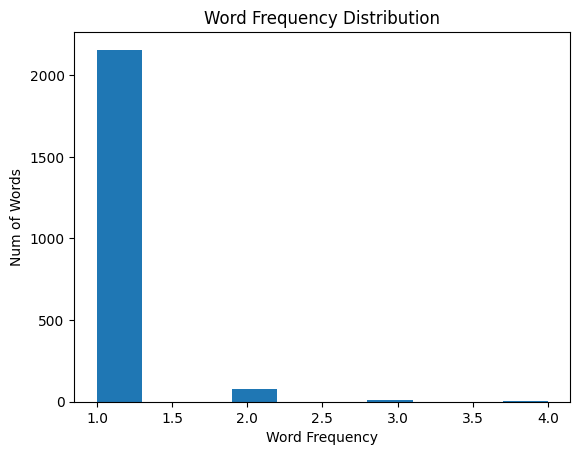

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


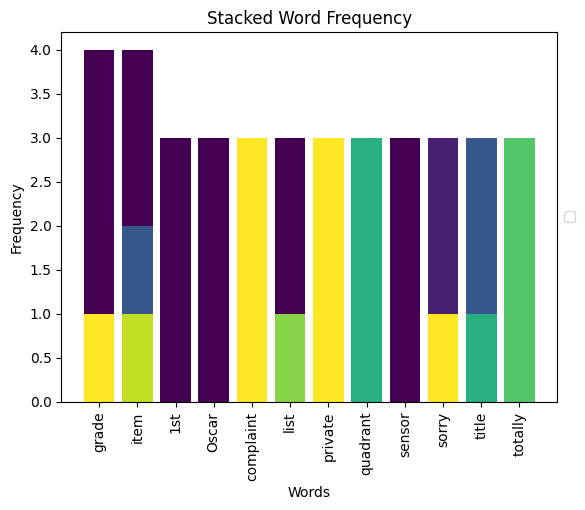

In [26]:
if __name__ == "__main__":
    # this block of code is executed when directly running the script, not when importing the script as a module
    """
    Feel free to modify the code inside this if block to test your functions
    """
    word_frequencies_list = []
    cumulated_frequency = None
    for i in range(1, 13):
        fileName = f'./data/transcript {i}.pdf'
        print(f"Processing {fileName}")

        # extract text from the PDF file
        text = extract_pdf_text(fileName)
        text = remove_headers(text)
        text = remove_parentheses(text)
        text = remove_speakers(text)
        # natural language preprocessing
        sentences = split_into_sentences(text)
        processed_text = []
        for sentence in sentences:
            tokens = tokenize_sentence(sentence)
            tokens = remove_stopwords(tokens)
            processed_text.append(tokens)

        # update count of word frequency
        cumulated_frequency = update_word_frequency(processed_text, cumulated_frequency)
        word_frequencies_list.append(cumulated_frequency.copy())

    # plot the word final cumulative frequency distribution
    plot_word_frequency_dist(word_frequencies_list[-1])

    # sort words by final cumulative frequency
    sorted_words = sort_words_by_frequency(word_frequencies_list[-1])

    # find bucket index of all words
    sorted_word_info = find_bucket_index_of_words(sorted_words)

    # take words whose bucket index >= 5 (i.e. frequency >= mean + 5 * std)
    filtered_words = [(info['word'], info['frequency']) for info in sorted_word_info if info['bucket'] >= 5]

    # plot stacked word frequency
    plot_stacked_word_frequency(word_frequencies_list, filtered_words)
    